In [8]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from numerical_mapping import *
from physico_chemical import *
from CGR import *
from basic_encoding import *
import os
from ML_models import *
import matplotlib.pyplot as plt
import seaborn as sns 
from utils import *
import warnings
warnings.filterwarnings("ignore")

ERROR! Session/line number was not unique in database. History logging moved to new session 25


# Load Data


<div style="text-align: center;">
  <img src="images\datasets.png" alt="Description" width="1000">
</div>

- Select a dataset
- Load train, validation and test data
- Look at data distribution 
- Extract sequences to generate features

## Select Dataset

The following code goes over each dataset within the directory <strong>'datasets'</strong> and allows user to select a dataset from the dropdown.

In [29]:
root_dir = "datasets"
subdirs = get_all_subdirs(root_dir) # internal function that goes over all subdirectories. Source code: utils.py

dropdown = widgets.Dropdown(
    options=subdirs,
    description='Select:',
    disabled=False,
)

selected_path = {'value': subdirs[0]}

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        selected_path['value'] = change['new']

dropdown.observe(on_change)

display(dropdown)

Dropdown(description='Select:', options=('datasets\\GUE\\EMP\\H3', 'datasets\\GUE\\EMP\\H3K14ac', 'datasets\\G…

### Reading Dataset

Each dataset folder has <strong> train, validation and test set</strong>. We shall use pandas to read them.

In [48]:
print('Dataset Selected: ',selected_path['value'])

train_data=pd.read_csv(selected_path['value']+'\\train.csv')#read_csv to read csv files
val_data=pd.read_csv(selected_path['value']+'\\dev.csv')
test_data=pd.read_csv(selected_path['value']+'\\test.csv')
data={'Train':train_data,'Val':val_data,'Test':test_data}

train_data.head(5)# displays first 5 datapoints

Dataset Selected:  datasets\GUE\splice\reconstructed
ERROR! Session/line number was not unique in database. History logging moved to new session 27


,sequence,label
0,CTGGTACAGGCCCCTGCGCCATGCAGGGCGGCGGGGATGCACACCT...,1
1,ATTAACTGATGGATATATGAAAACAGTATACTGCGTGACAACACCT...,1
2,CATCAAAGTTGCTATAGAAGTGATTGAGGTTCTGCTATAAGGTTAT...,2
3,CCTTTCTTTTCATAGAGCAGTTTGGAAACCCTCTGTTTGTGAAGTC...,2
4,CAAGGCTGAATAATATTCCATTGTATCAAATATGTCTTCAGGTTCC...,2


In [49]:
max_length=len(train_data['sequence'][0]) #setting max-length of sequences for computation 
max_length

400

### Labels and Distribution

Storing the labels and data type (train/test/val) in a dataframe to look at how each label is distributed.

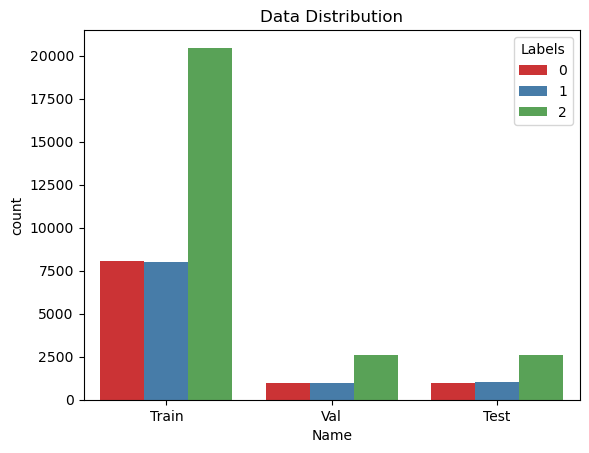

In [50]:
labels=[]
dataname=[]
for d in data:
    labels.extend((data[d])['label'])
    dataname.extend([d]*len(data[d].index))
    
label_distr=pd.DataFrame({'Labels':labels,'Name':dataname})
label_distr.reset_index() #resetting index to start from 0

sns.countplot(label_distr,x='Name',hue='Labels',palette='Set1')#reference: seaborn
plt.title('Data Distribution')
plt.show()

### Read Sequences

Extracting sequences for further computing of features.

In [51]:
sequences={}

for d in data:
    sequences[d]=(data[d])['sequence']
    
pd.DataFrame(sequences).head(5)

,Train,Val,Test
0,CTGGTACAGGCCCCTGCGCCATGCAGGGCGGCGGGGATGCACACCT...,GTCCAGCCAACATGGAGAAGTACATTTCTAGGGACTAAACCTGGCT...,ACCTCAGGTGATCCACCCGCCTCGGCCTCCCAAAGTGCTGGGATTA...
1,ATTAACTGATGGATATATGAAAACAGTATACTGCGTGACAACACCT...,GAGATTACAGGCATGAGCCACCATACTCAGCCATAGTTTCCTAATC...,AAGAAAGTGTGTAGGCAGAGAAAACTTACTTATGGTTTGAAGAACC...
2,CATCAAAGTTGCTATAGAAGTGATTGAGGTTCTGCTATAAGGTTAT...,CAGGAGATATCCAGTTAAATTAATTAGCTTTTCTTTCCACTCCAAC...,CACTTTTGGCTGGTCAGAGAAGGAATAATGATATCACCTTCTTCCC...
3,CCTTTCTTTTCATAGAGCAGTTTGGAAACCCTCTGTTTGTGAAGTC...,GCCCAACTGTAAACATCAGTGCACATGTATTGATGGCGCCGTGGGC...,GAAAAAAACAGCTACTGTAAACATTCTCATACAAGATTTTATGAGA...
4,CAAGGCTGAATAATATTCCATTGTATCAAATATGTCTTCAGGTTCC...,GCATACTTGTTCTTCAGTATCGTGTGTCTGATGCTGCTGAGCGTGG...,AAGACTACTTCACCCATCTCTTGGAATAGACCCATTGGCTGCTTTT...


# Extract Features

From sequences extract each feature dataframe for further analysis.


## Basic Encodings

### One-Hot

<strong>What</strong>: Binary vector representing each nucleotide (e.g., A = [1,0,0,0]).

<strong>When to Use</strong>: Deep learning, where fixed input formats are needed.

<strong>Drawbacks</strong>: High dimensionality, ignores sequence context, no similarity captured.

<div style="text-align: center;">
  <img src="images\OneHot.png" alt="Description" width="500">
</div>

In [52]:
one_hot_feat=pd.DataFrame()
for seq_set in sequences:
    one_hot_feat=pd.concat([one_hot_feat,pd.DataFrame(one_hot_encode_sequences(sequences[seq_set]))],ignore_index=True)#for each set-> generates features and appends to the final dataset using concat function. Soruce of feature generating fucntion: basic_encoding
one_hot_feat.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


### K-mer

<strong>What</strong>: Counts frequency of subsequences of length k (e.g., all 3-mers in a DNA string).

<strong>When to Use</strong>: Feature engineering for ML models, sequence comparison.

<strong>Drawbacks</strong>: Loses global order, large k leads to sparse high-dimensional space.

<div style="text-align: center;">
  <img src="images\Kmer.png" alt="Description" width="500">
</div>

In [53]:
kmer_feat=pd.DataFrame()
for seq_set in sequences:
    kmer_feat=pd.concat([kmer_feat,pd.DataFrame(generate_kmer_features(sequences[seq_set],4))],ignore_index=True)#for each set-> generates features and appends to the final dataset using concat function. Soruce of feature generating fucntion: basic_encoding
kmer_feat.head(5)

,A,C,G,T,AA,AC,AG,AT,CA,CC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,0.2000,0.3150,0.3225,0.1625,0.027569,0.062657,0.070175,0.040100,0.095238,0.110276,...,0.000000,0.002519,0.000000,0.002519,0.002519,0.000000,0.000000,0.002519,0.002519,0.002519
1,0.3225,0.1950,0.1650,0.3175,0.117794,0.065163,0.055138,0.082707,0.072682,0.050125,...,0.000000,0.002519,0.007557,0.002519,0.005038,0.012594,0.007557,0.007557,0.017632,0.015113
2,0.3350,0.1425,0.1525,0.3700,0.137845,0.035088,0.062657,0.097744,0.057644,0.022556,...,0.000000,0.007557,0.010076,0.005038,0.005038,0.002519,0.020151,0.010076,0.007557,0.032746
3,0.2925,0.1875,0.1950,0.3250,0.107769,0.060150,0.075188,0.050125,0.070175,0.027569,...,0.005038,0.012594,0.015113,0.002519,0.007557,0.015113,0.002519,0.010076,0.025189,0.010076
4,0.2900,0.1800,0.1750,0.3550,0.082707,0.047619,0.045113,0.115288,0.077694,0.050125,...,0.000000,0.000000,0.007557,0.002519,0.007557,0.007557,0.025189,0.007557,0.010076,0.025189


## Numerical Mapping


### Integer

<strong>What</strong>: Encodes nucleotides as integers (e.g., A=0, C=1, G=2, T=3).

<strong>When to Use</strong>: Simple ML models, sequence alignment, indexing.

<strong>Drawbacks</strong>: Imposes false ordinal relationships; lacks biological meaning.

<div style="text-align: center;">
  <img src="images\integer.png" alt="Description" width="800">
</div>

In [54]:
integer_feat=pd.DataFrame()
for seq_set in sequences:
    integer_feat=pd.concat([integer_feat,pd.DataFrame(integer_features(sequences[seq_set],max_length))],ignore_index=True)#for each set-> generates features and appends to the final dataset using concat function. Soruce of feature generating fucntion: numerical_mapping
integer_feat.head(5)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1,0,3,3,0,2,1,2,3,3,...,0,0,1,1,0,3,3,3,3,0
1,2,0,0,2,2,1,0,3,2,0,...,0,1,1,2,1,0,2,2,1,2
2,1,2,0,1,2,2,2,3,0,0,...,0,2,2,2,2,2,2,0,2,2
3,1,1,0,0,0,1,0,0,0,0,...,3,1,2,2,3,3,3,0,3,0
4,1,2,2,3,3,1,0,3,2,2,...,3,3,3,2,0,0,0,0,3,0


### Z-curve

<strong>What</strong>: 3D curve representation based on nucleotide distribution.

<strong>When to Use</strong>: Genome comparison, gene identification.

<strong>Drawbacks</strong>: Complex to compute and interpret; limited to certain applications.

<div style="text-align: center;">
  <img src="images\Z-curve.png" alt="Description" width="700">
</div>

In [55]:
zcurve_feat=pd.DataFrame()
for seq_set in sequences:
    zcurve_feat=pd.concat([zcurve_feat,pd.DataFrame(zcurve_features(sequences[seq_set],max_length))],ignore_index=True)#for each set-> generates features and appends to the final dataset using concat function. Soruce of feature generating fucntion: numerical_mapping
zcurve_feat.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,-1,-2,-1,0,-1,0,-1,0,1,2,...,-107,-106,-107,-108,-107,-108,-109,-110,-111,-110
1,1,0,-1,0,1,0,-1,0,1,0,...,111,110,109,110,109,110,111,112,111,112
2,-1,0,-1,-2,-1,0,1,2,1,0,...,155,156,157,158,159,160,161,162,163,164
3,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,...,95,94,95,96,95,94,93,94,93,94
4,-1,0,1,2,3,2,1,2,3,4,...,113,112,111,112,113,114,115,116,115,116


## Pysico-Chemical Features

### GC Content

<strong>What</strong>: Proportion of G and C nucleotides.

<strong>When to Use</strong>: Genome classification, stability prediction.

<strong>Drawbacks</strong>: Very coarse; ignores sequence order and context.

<div style="text-align: center;">
  <img src="images\GC.png" alt="Description" width="800">
</div>

In [56]:
gc_feat=pd.DataFrame()
for seq_set in sequences:
    gc_feat=pd.concat([gc_feat,pd.DataFrame(gc_content_features(sequences[seq_set]))],ignore_index=True)#for each set-> generates features and appends to the final dataset using concat function. Soruce of feature generating fucntion: physico_chemical
gc_feat.head(5)

,GC_Content,G_Count,C_Count,Length
0,0.6375,129,126,400
1,0.3600,66,78,400
2,0.2950,61,57,400
3,0.3825,78,75,400
4,0.3550,70,72,400


### Global Descriptors

<strong>What</strong>: Aggregated statistical features 

<strong>When to Use</strong>: Classification tasks, especially in ML.

<strong>Drawbacks</strong>: May lose local sequence information; interpretation can be difficult.

<div style="text-align: center;">
  <img src="images\GD.png" alt="Description" width="500">
</div>

In [57]:
gd_feat=pd.DataFrame()
for seq_set in sequences:
    gd_feat=pd.concat([gd_feat,pd.DataFrame(global_descriptor_features(sequences[seq_set]))],ignore_index=True)#for each set-> generates features and appends to the final dataset using concat function. Soruce of feature generating fucntion: physico_chemical
gd_feat.head(5)

,Comp_A,Comp_C,Comp_G,Comp_T,Trans_CT,Trans_TG,Trans_GG,Trans_GT,Trans_TA,Trans_AC,...,Dist_G_0,Dist_G_1,Dist_G_2,Dist_G_3,Dist_G_4,Dist_T_0,Dist_T_1,Dist_T_2,Dist_T_3,Dist_T_4
0,0.2000,0.3150,0.3225,0.1625,0.057644,0.072682,0.127820,0.045113,0.015038,0.062657,...,0.0050,0.1950,0.4700,0.7025,0.995,0.0025,0.3125,0.5175,0.7275,0.9975
1,0.3225,0.1950,0.1650,0.3175,0.060150,0.067669,0.030075,0.052632,0.072682,0.065163,...,0.0175,0.2275,0.4950,0.7300,0.960,0.0025,0.2900,0.5900,0.7600,0.9875
2,0.3350,0.1425,0.1525,0.3700,0.062657,0.062657,0.027569,0.050125,0.100251,0.035088,...,0.0175,0.1675,0.3325,0.5150,0.965,0.0050,0.3175,0.5775,0.7850,0.9925
3,0.2925,0.1875,0.1950,0.3250,0.072682,0.075188,0.027569,0.070175,0.045113,0.060150,...,0.0350,0.2100,0.4650,0.7525,0.995,0.0050,0.2325,0.4850,0.7375,0.9975
4,0.2900,0.1800,0.1750,0.3550,0.040100,0.065163,0.052632,0.052632,0.085213,0.047619,...,0.0075,0.4050,0.6225,0.8225,0.995,0.0150,0.2225,0.4525,0.7900,0.9975


## Advanced Representations

### Chaos Game Representation

<strong>What</strong>: Fractal-like image encoding sequence as 2D patterns.

<strong>When to Use</strong>: Visual pattern recognition, deep learning on images.

<strong>Drawbacks</strong>: Computationally heavy for long sequences; hard to interpret directly.

<div style="text-align: center;">
  <img src="images\CGR.png" alt="Description" width="500">
</div>


In [58]:
cgr_feat=pd.DataFrame()
for seq_set in sequences:
    cgr_feat=pd.concat([cgr_feat,pd.DataFrame(classifical_chaos_features(sequences[seq_set],max_length))],ignore_index=True)#for each set-> generates features and appends to the final dataset using concat function. Soruce of feature generating fucntion: CGR
cgr_feat.head(5)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-0.5,-0.75,0.125,0.5625,-0.21875,0.390625,-0.304688,0.347656,0.673828,0.836914,...,0.346261,0.673130,-0.163435,-0.581717,0.209141,-0.395429,-0.697715,-0.848857,-0.924429,0.037786
1,0.5,-0.25,-0.625,0.1875,0.59375,-0.203125,-0.601562,0.199219,0.599609,-0.200195,...,0.983394,-0.008303,-0.504152,0.247924,-0.376038,0.311981,0.655991,0.827995,-0.086002,0.456999
2,-0.5,0.25,-0.375,-0.6875,0.15625,0.578125,0.789062,0.894531,-0.052734,-0.526367,...,0.933471,0.966736,0.983368,0.991684,0.995842,0.997921,0.998960,0.999480,0.999740,0.999870
3,-0.5,-0.75,-0.875,-0.9375,-0.96875,-0.984375,-0.992188,-0.996094,-0.998047,-0.999023,...,-0.017740,-0.508870,0.245565,0.622782,-0.188609,-0.594304,-0.797152,0.101424,-0.449288,0.275356
4,-0.5,0.25,0.625,0.8125,0.90625,-0.046875,-0.523438,0.238281,0.619141,0.809570,...,-0.666023,-0.833011,-0.916506,0.041747,0.520874,0.760437,0.880218,0.940109,-0.029945,0.485027


# Univariate Analysis

- Load the feature dataframes one by one
- Run them through 4 different models
- Store all accuracies and get the boxplot for comparison

<div style="text-align: center;">
  <img src="images\univar.png" alt="Description" width="1000">
</div>

Training Models: 100%|███████████████████████████████████████████████████████████| 4/4 [05:24<00:00, 81.24s/it]


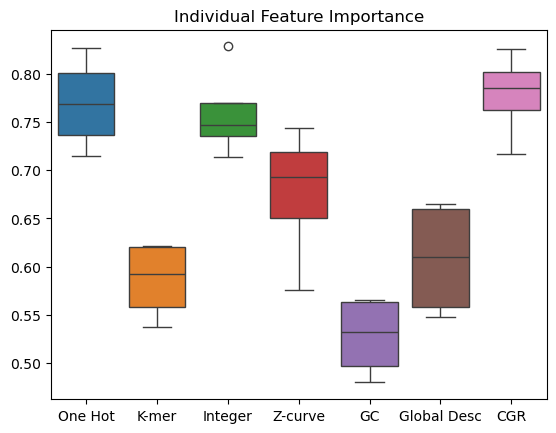

In [59]:
feats=[one_hot_feat,kmer_feat,integer_feat,zcurve_feat,gc_feat,gd_feat,cgr_feat]
accuracy={}
feat_names=['One Hot','K-mer','Integer','Z-curve','GC','Global Desc','CGR']
for feat_ind in range(0,7):
    feat=(feats[feat_ind]).fillna(0)#replace any NaNs with 0
    train_feats=feat[label_distr['Name']=='Train']#extract train data
    test_feats=feat[label_distr['Name']=='Test']#extract train labels
    train_labels=label_distr[label_distr['Name']=='Train']['Labels']#extract test data
    test_labels=label_distr[label_distr['Name']=='Test']['Labels']#extract test labels
    accuracy[feat_names[feat_ind]]=run_models(train_feats,train_labels,test_feats,test_labels)#source of training function: ML_models
    
sns.boxplot(accuracy)
plt.title('Individual Feature Importance')
plt.show()
    

# Multivariate Analysis

- Combine all features while dropping each feature one at a time
- Run them through 4 different models
- Store all accuracies and get the boxplot for comparison

<div style="text-align: center;">
  <img src="images\drop.png" alt="Description" width="1000">
</div>

In [ ]:
feats=[one_hot_feat,kmer_feat,integer_feat,zcurve_feat,gc_feat,gd_feat,cgr_feat]
accuracy={}
feat_names=['One Hot','K-mer','Integer','Z-curve','GC','Global Desc','CGR']
for feat_ind in range(0,7):
    combined_feat_set=pd.concat(feats[:feat_ind] + feats[feat_ind+1:],axis=1)#combine feature dfs for all except current index
    combined_feat_set.columns=[i for i in range(0,len(combined_feat_set.keys()))]#rename columns to prevent duplicate keys
    combined_feat_set=combined_feat_set.fillna(0)#replace any NaNs with 0
    train_feats=combined_feat_set[label_distr['Name']=='Train']#extract train data
    test_feats=combined_feat_set[label_distr['Name']=='Test']#extract train labels
    train_labels=label_distr[label_distr['Name']=='Train']['Labels']#extract test data
    test_labels=label_distr[label_distr['Name']=='Test']['Labels']#extract test labels
    accuracy[feat_names[feat_ind]]=run_models(train_feats,train_labels,test_feats,test_labels)#source of training function: ML_models
    
sns.boxplot(accuracy)
plt.title('Effect of Dropping a Feature')
plt.show()
    

Training Models:  25%|██████████████▌                                           | 1/4 [02:56<08:49, 176.65s/it]

# Conclusions

#### Dataset 1 tested: 
------------------------------

*Add findings here*

*-*

*-*

#### Dataset 2 tested:
------------------------------

*Add findings here*

*-*

*-*

#### Dataset 3 tested:
------------------------------

*Add findings here*

*-*

*-*